In [1]:
import pandas as pd
import requests
import acquire, prep
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data


In [2]:
df = acquire.combine_all()
df.head(1)

sale_amount                      sale_date  sale_id item_brand  item_id  \
0         13.0  Tue, 01 Jan 2013 00:00:00 GMT        1   Riceland        1   

                        item_name  item_price   item_upc12   item_upc14  \
0  Riceland American Jazmine Rice        0.84  35200264013  35200264013   

            store_address   store_city  store_id store_state store_zipcode  
0  12125 Alamo Ranch Pkwy  San Antonio         1          TX         78253

In [3]:
df = prep.make_datetime(df)

In [4]:
df = prep.set_index(df)
df.head(1)

sale_amount  sale_id item_brand  item_id  \
sale_date                                                             
2013-01-01 00:00:00+00:00         13.0        1   Riceland        1   

                                                item_name  item_price  \
sale_date                                                               
2013-01-01 00:00:00+00:00  Riceland American Jazmine Rice        0.84   

                            item_upc12   item_upc14           store_address  \
sale_date                                                                     
2013-01-01 00:00:00+00:00  35200264013  35200264013  12125 Alamo Ranch Pkwy   

                            store_city  store_id store_state store_zipcode  
sale_date                                                                   
2013-01-01 00:00:00+00:00  San Antonio         1          TX         78253

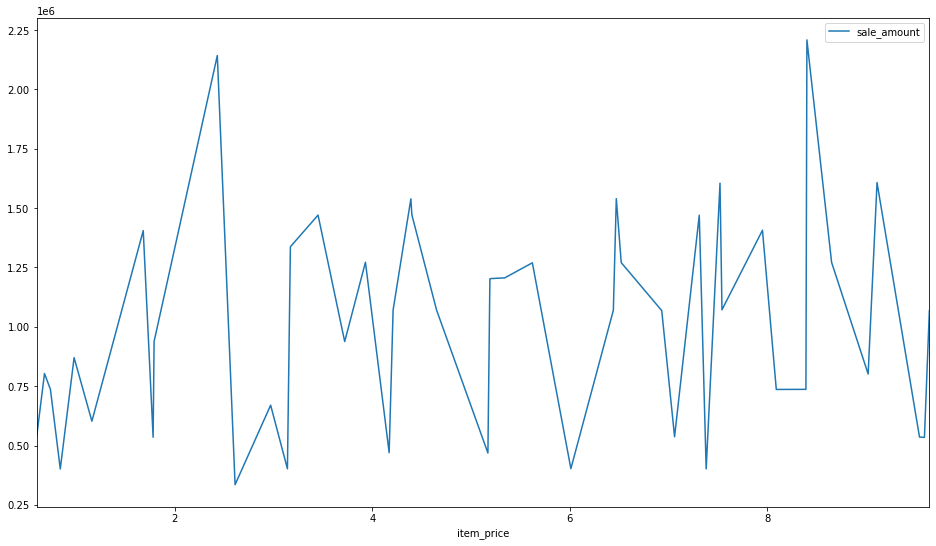

In [5]:
plt.rc('figure', figsize=(16,9))
# sns.scatterplot(df.sale_amount,df.item_price)

by_date = df.groupby(['item_price'])['sale_amount']\
            .sum().reset_index()
by_date.plot(x='item_price', y='sale_amount')

In [6]:
# df.set_index('sale_date', inplace=True)

In [7]:
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [8]:
df['sales_total'] = df.sale_amount * df.item_price

In [9]:
df.head(1)

sale_amount  sale_id item_brand  item_id  \
sale_date                                                             
2013-01-01 00:00:00+00:00         13.0        1   Riceland        1   

                                                item_name  item_price  \
sale_date                                                               
2013-01-01 00:00:00+00:00  Riceland American Jazmine Rice        0.84   

                            item_upc12   item_upc14           store_address  \
sale_date                                                                     
2013-01-01 00:00:00+00:00  35200264013  35200264013  12125 Alamo Ranch Pkwy   

                            store_city  store_id store_state store_zipcode  \
sale_date                                                                    
2013-01-01 00:00:00+00:00  San Antonio         1          TX         78253   

                           day_of_week  month  sales_total  
sale_date                                                   
2013-01-01 00:00:00+00:00            1      1        10.92

In [10]:
day_sales = pd.DataFrame(df.sales_total.resample('D').sum())
day_sales['diff'] = day_sales.sales_total.diff(1)
day_sales

sales_total     diff
sale_date                                      
2013-01-01 00:00:00+00:00     73844.01      NaN
2013-01-02 00:00:00+00:00     73570.58  -273.43
2013-01-03 00:00:00+00:00     78169.48  4598.90
2013-01-04 00:00:00+00:00     84467.73  6298.25
2013-01-05 00:00:00+00:00     87621.85  3154.12
...                                ...      ...
2017-12-27 00:00:00+00:00    109151.15 -2850.06
2017-12-28 00:00:00+00:00    117377.49  8226.34
2017-12-29 00:00:00+00:00    126541.84  9164.35
2017-12-30 00:00:00+00:00    134903.07  8361.23
2017-12-31 00:00:00+00:00    140905.74  6002.67

[1826 rows x 2 columns]

### Power data

In [12]:
df = acquire.get_power_data()
df.head()

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN

In [13]:
df.Date = pd.to_datetime(df.Date)

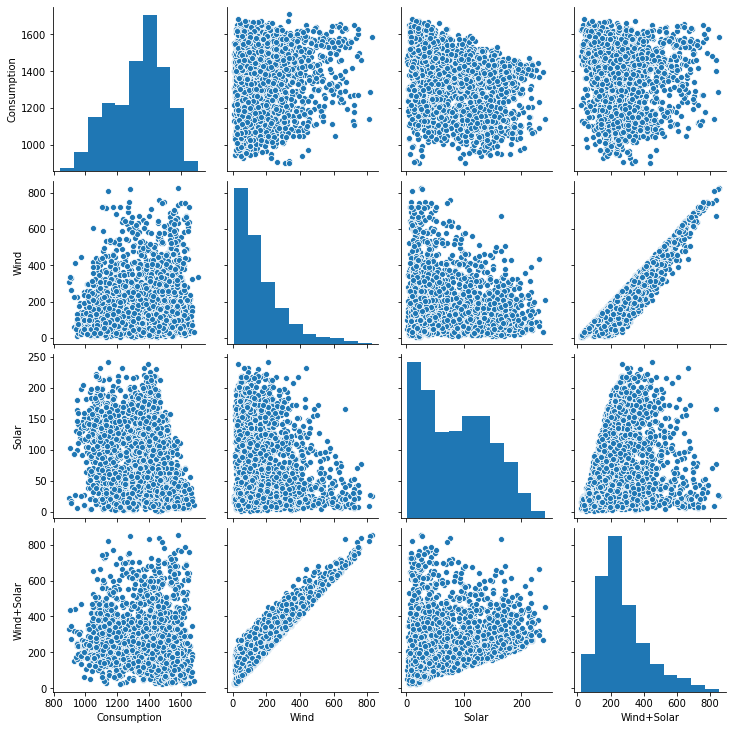

In [14]:
sns.pairplot(df)

In [15]:
df.set_index('Date', inplace=True)
df.head()

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN

In [16]:
df['year'] = df.index.year
df['month'] = df.index.month

In [17]:
df.head()

Consumption  Wind  Solar  Wind+Solar  year  month
Date                                                         
2006-01-01     1069.184   NaN    NaN         NaN  2006      1
2006-01-02     1380.521   NaN    NaN         NaN  2006      1
2006-01-03     1442.533   NaN    NaN         NaN  2006      1
2006-01-04     1457.217   NaN    NaN         NaN  2006      1
2006-01-05     1477.131   NaN    NaN         NaN  2006      1

In [18]:
df = data.sf_temps()
df.head()

temp                date
0  47.8 2010-01-01 00:00:00
1  47.4 2010-01-01 01:00:00
2  46.9 2010-01-01 02:00:00
3  46.5 2010-01-01 03:00:00
4  46.0 2010-01-01 04:00:00

In [19]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

temp
date                     
2010-01-01 00:00:00  47.8
2010-01-01 01:00:00  47.4
2010-01-01 02:00:00  46.9
2010-01-01 03:00:00  46.5
2010-01-01 04:00:00  46.0

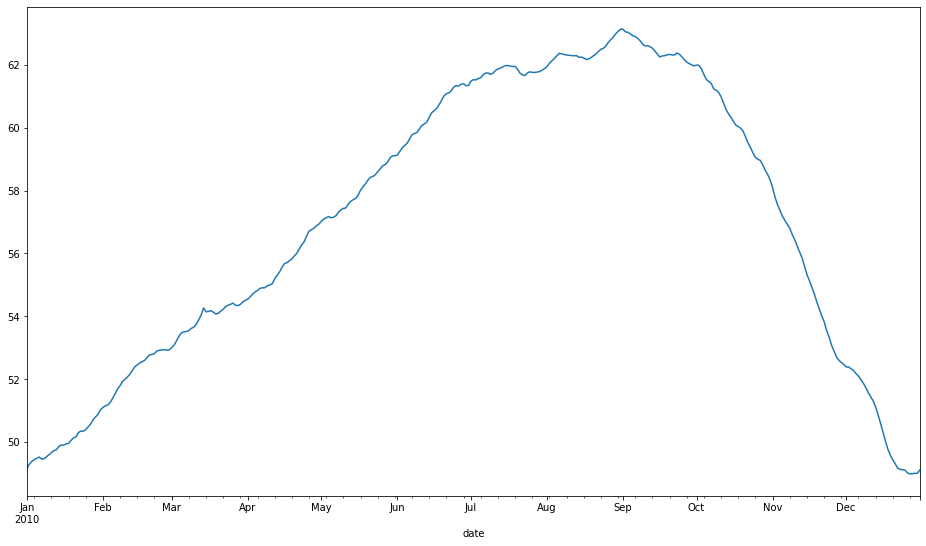

In [20]:
df.temp.resample('D').mean().plot()

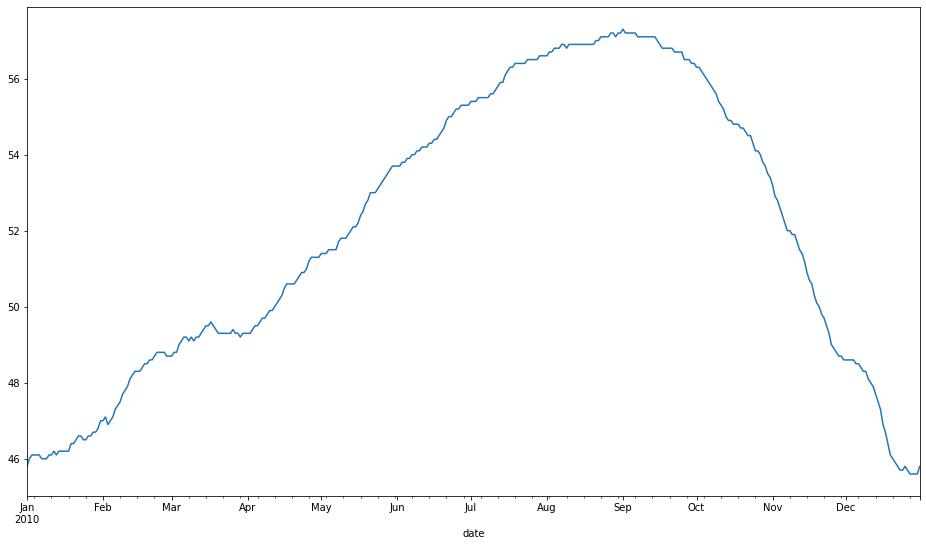

In [21]:
df.temp.resample('D').min().plot()

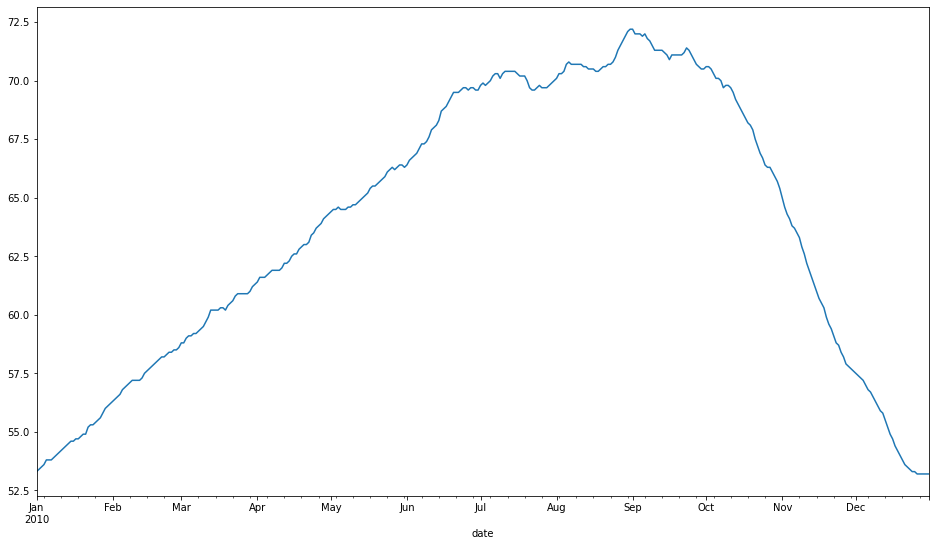

In [22]:
df.temp.resample('D').max().plot()

In [23]:
df.temp.resample('M').mean().nsmallest(1)

date
2010-01-31    49.98414
Freq: M, Name: temp, dtype: float64

In [24]:
df.temp.resample('M').mean().nlargest(1)

date
2010-09-30    62.487083
Freq: M, Name: temp, dtype: float64

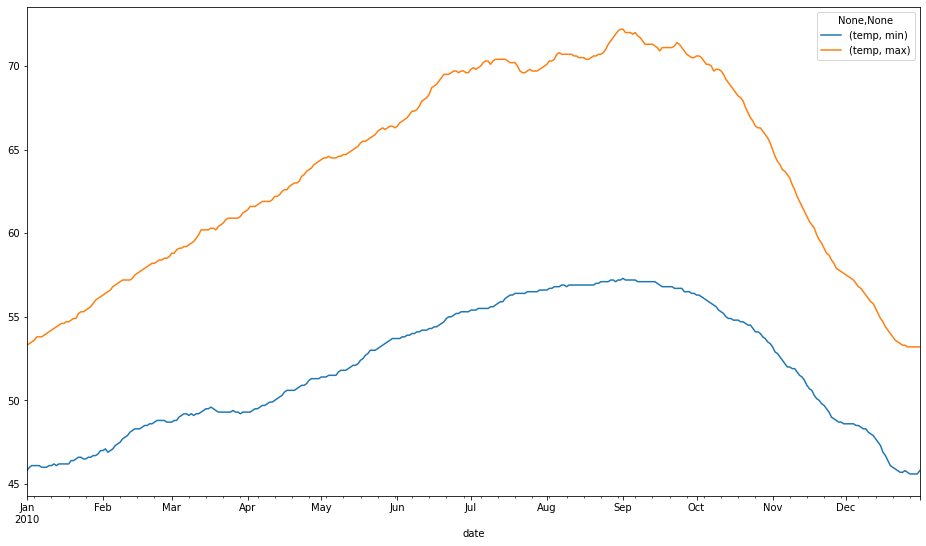

In [25]:
df.resample('D').aggregate(['min','max']).plot()

In [26]:
df_minmax = df.resample('D').aggregate(['min','max'])
df_minmax['diff'] = df_minmax[('temp', 'max')] - \
                    df_minmax[('temp', 'min')]
df_minmax[('diff', '')].resample('M').sum().nlargest(1)

date
2010-07-31    433.3
Freq: M, Name: (diff, ), dtype: float64

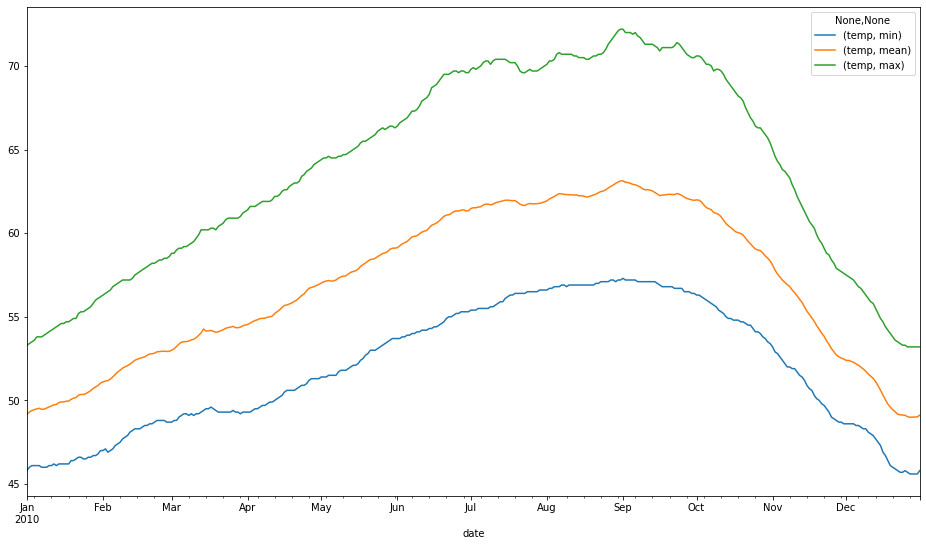

In [27]:
df.resample('D').aggregate(['min','mean','max']).plot()

## Flights 20k data

In [68]:
df = data.flights_20k()
df.head()

date  delay  distance origin destination
0 2001-01-13 14:56:00     32       417    SAN         SJC
1 2001-01-31 16:40:00     -5      1093    FLL         ISP
2 2001-02-11 18:39:00      3       293    LBB         DAL
3 2001-01-10 21:00:00    -15       550    MSY         MCO
4 2001-03-30 21:45:00     -2       229    STL         IND

In [69]:
df.delay[df.delay < 0] = 0
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date  delay  distance origin destination
0 2001-01-13 14:56:00     32       417    SAN         SJC
1 2001-01-31 16:40:00      0      1093    FLL         ISP
2 2001-02-11 18:39:00      3       293    LBB         DAL
3 2001-01-10 21:00:00      0       550    MSY         MCO
4 2001-03-30 21:45:00      0       229    STL         IND

In [70]:
df.set_index('date', inplace=True)

In [71]:
df = df.sort_index()
df.head()

delay  distance origin destination
date                                                   
2001-01-01 00:01:00     14       405    MCI         MDW
2001-01-01 06:20:00      0       491    BNA         MCI
2001-01-01 06:30:00      0       251    MDW         STL
2001-01-01 07:00:00      0       361    OAK         ONT
2001-01-01 07:00:00      0       303    MSY         HOU

In [72]:
df.shape

(20000, 4)

In [84]:
df['hour'] = df.index.hour
df['day'] = df.index.dayofweek
df['month'] = df.index.month

In [85]:
df.head()

delay  distance origin destination  day  hour  month
date                                                                     
2001-01-01 00:01:00     14       405    MCI         MDW    0     0      1
2001-01-01 06:20:00      0       491    BNA         MCI    0     6      1
2001-01-01 06:30:00      0       251    MDW         STL    0     6      1
2001-01-01 07:00:00      0       361    OAK         ONT    0     7      1
2001-01-01 07:00:00      0       303    MSY         HOU    0     7      1

In [87]:
df.groupby('hour').delay.mean().nlargest(1)

hour
3    302.5
Name: delay, dtype: float64

In [88]:
df.groupby('day').delay.mean()

day
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

Friday has a much higher delay than other days, and Monday has a lower delay

In [90]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

March seems to have lower delays than other months